In [1]:
#from PyQt5.QtWidgets import *
#from PyQt5.QtGui import *
#from PyQt5.QtCore import Qt
import os
#from array import array
import numpy as np
from commpy.filters import rcosfilter
from commpy.filters import rrcosfilter
import matplotlib
import matplotlib.pyplot as plt
import ipympl
#%matplotlib inline
%matplotlib widget
%load_ext autoreload
%autoreload 2
import dsp_lib

In [2]:
from scipy.signal import butter, filtfilt
import os
from array import array

In [3]:
def plot_signal_power(signal, figure_counter, title="Signal Power"):
    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(0, len(signal))
    plt.plot(x_data, signal)
    plt.grid(1)
    plt.xlabel('time (samples)')
    plt.ylabel('Signal Power')
    plt.title(title)
    plt.show()

def upscale_to_i16(signal):
    max_i16 = 32767
    print(max(signal))
    print(max(signal.real))
    print(max(signal.imag))
    coeff = max_i16 / max(max(signal.real), max(signal.imag))
    print(coeff)
    return signal * np.floor(coeff)

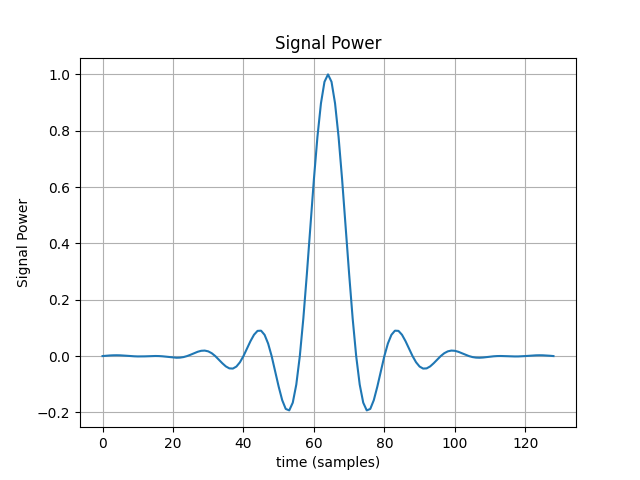

1032000


In [4]:
sig_board = 0.168
N = 129#100
Fs = 1
T_symb = 8#1 / sig_board
s_rc = dsp_lib.gen_rc_filter_impulse_response(N, Fs, T_symb)
plot_signal_power(s_rc, 0)


f0 = 2.5 # f_carrier / f_symbol
phase_0 = 3 / 9 # semicircles
delay = 0.1

N_symb = N * 1000
sps = 8 # f_sampling / f_symbol (SPS)
s_qpsk = dsp_lib.gen_qpsk_symbols(N_symb, sps)
qpsk_rc = np.convolve(s_qpsk, s_rc, 'same')
dsp_lib.save_cmplx_sig(s_qpsk[::8], 'qpsk_constellation.dat', 'int16')
print(len(s_qpsk))

In [5]:
mixed_qpsk = dsp_lib.add_freq(qpsk_rc, 0.5)
mixed_qpsk = dsp_lib.add_phase(mixed_qpsk, 0.3)

In [6]:
two_sigs = mixed_qpsk + qpsk_rc
two_sigs = upscale_to_i16(two_sigs)

(4.603747153994975-1.4496943964668247j)
4.603747153994975
4.554397200105128
7117.462993502133


129
1
8
(4.320039422256755-1.3496515096616004j)
4.320039422256755
4.267560434953523
7584.8844876704325


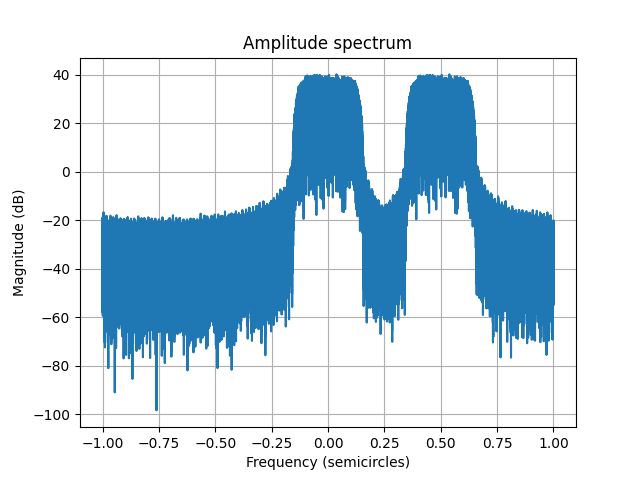

array([[-32.62366503],
       [-24.38116562],
       [-41.70106482],
       ...,
       [-28.66614247],
       [-20.13326012],
       [-26.33080639]])

In [7]:
print(N)
print(Fs)
print(T_symb)
s_rrc = dsp_lib.gen_rrc_filter_impulse_response(N, Fs, T_symb)
qpsk_rrc = np.convolve(s_qpsk, s_rrc, 'same')
mixed_qpsk = dsp_lib.add_freq(qpsk_rrc, 0.5)
mixed_qpsk = dsp_lib.add_phase(mixed_qpsk, 0.3)
two_sigs = mixed_qpsk + qpsk_rrc
max(two_sigs)
two_sigs_upsc = upscale_to_i16(two_sigs)
dsp_lib.save_cmplx_sig(two_sigs_upsc, 'qpsk_rrc_float.bin', 'float64')
max(two_sigs_upsc)
dsp_lib.plot_spectrum(two_sigs_upsc, 10)

129
1
8
(4.320039422256755-1.3496515096616004j)
4.320039422256755
4.267560434953523
7584.8844876704325
sig len = 1032000


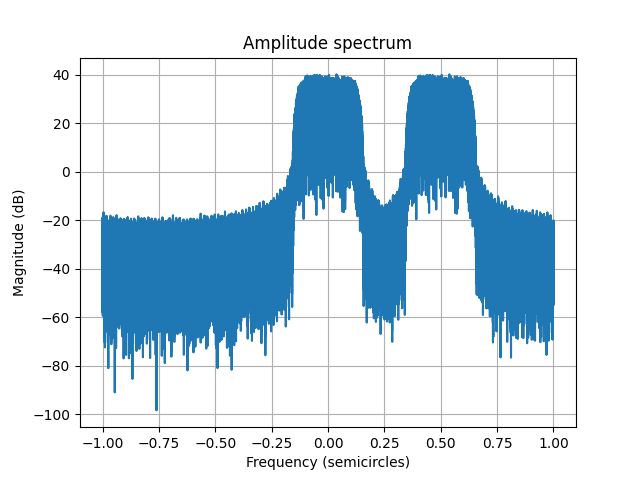

[18232.84695497 -5381.10792715j  6581.29344813 +3549.42546515j
 -3556.14850676-11514.13261019j 12219.6844817 -23862.07186833j
 24441.15854437 -8291.50215685j  8027.24977265 +3805.79926772j
 -4354.35868324-11677.12791951j  9673.55060162-21769.12591467j
 17891.71577304 -7047.08515908j  4834.73074919 +2168.48552295j]


In [8]:
print(N)
print(Fs)
print(T_symb)
s_rrc = dsp_lib.gen_rrc_filter_impulse_response(N, Fs, T_symb)
qpsk_rrc = np.convolve(s_qpsk, s_rrc, 'same')
mixed_qpsk = dsp_lib.add_freq(qpsk_rrc, 0.5)
mixed_qpsk = dsp_lib.add_phase(mixed_qpsk, 0.3)
two_sigs = mixed_qpsk + qpsk_rrc
two_sigs_upsc = upscale_to_i16(two_sigs)
print(f"sig len = {len(two_sigs_upsc)}")
dsp_lib.save_cmplx_sig(two_sigs_upsc, 'qpsk_rrc_float64.bin', 'float64')
dsp_lib.save_cmplx_sig(two_sigs_upsc, 'qpsk_rrc_float32.bin', 'float32')
max(two_sigs_upsc)
dsp_lib.plot_spectrum(two_sigs_upsc, 10)
print(two_sigs_upsc[:10])

In [9]:
qpsk_rrc_rrc = np.convolve(two_sigs_upsc, s_rrc, 'same')
print(two_sigs_upsc[:10])
print(s_rrc)
print(qpsk_rrc_rrc[:10])
print(qpsk_rrc_rrc[len(qpsk_rrc_rrc) - 10::])
# samples_32 = dsp_lib.read_signal('qpsk_rrc_float32.bin', 'float32')
# sig32 = dsp_lib.make_cmplx_sig(samples_32)
# print(sig32[:10])

[18232.84695497 -5381.10792715j  6581.29344813 +3549.42546515j
 -3556.14850676-11514.13261019j 12219.6844817 -23862.07186833j
 24441.15854437 -8291.50215685j  8027.24977265 +3805.79926772j
 -4354.35868324-11677.12791951j  9673.55060162-21769.12591467j
 17891.71577304 -7047.08515908j  4834.73074919 +2168.48552295j]
[-5.27526056e-03 -3.99102742e-03 -1.64842729e-03  1.29551186e-03
  4.20829446e-03  6.41713384e-03  7.36294421e-03  6.73849224e-03
  4.57739857e-03  1.26984331e-03 -2.50378491e-03 -5.91158303e-03
 -8.15394430e-03 -8.65281056e-03 -7.20253053e-03 -4.04416717e-03
  1.59973235e-04  4.45338056e-03  7.79222114e-03  9.28996172e-03
  8.44532739e-03  5.29838667e-03  4.71398168e-04 -4.92610836e-03
 -9.51895698e-03 -1.19753744e-02 -1.13400852e-02 -7.31607595e-03
 -4.23543130e-04  8.01507220e-03  1.60811386e-02  2.16328990e-02
  2.27812262e-02  1.83734040e-02  8.37737184e-03 -5.93206756e-03
 -2.20523040e-02 -3.66153950e-02 -4.59937904e-02 -4.70527982e-02
 -3.79107833e-02 -1.85494904e-02  

In [10]:
print(qpsk_rrc_rrc[:10])

[45721.30271634-35531.48817126j 55742.77166006-48392.49348343j
 64428.26748734-60609.40383278j 71160.73181637-71133.33562898j
 75564.46479526-78789.07000331j 77249.85454818-82461.68015851j
 75865.39053261-81492.6162647j  71359.16510258-75744.01833955j
 63941.10483368-65379.05183368j 53786.32517171-50879.71699882j]


[18232.84695497 -5381.10792715j  6581.29344813 +3549.42546515j
 -3556.14850676-11514.13261019j 12219.6844817 -23862.07186833j
 24441.15854437 -8291.50215685j  8027.24977265 +3805.79926772j
 -4354.35868324-11677.12791951j  9673.55060162-21769.12591467j
 17891.71577304 -7047.08515908j  4834.73074919 +2168.48552295j]
(119098.3301216445-20080.12952850425j)
119098.3301216445
118852.8050103492
0.2751256039151219


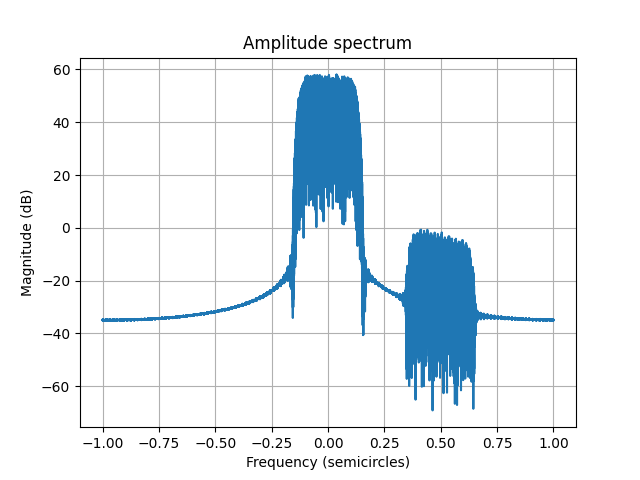

array([[-34.98463355],
       [-35.0788148 ],
       [-34.95033571],
       ...,
       [-35.01692346],
       [-35.10034749],
       [-34.90973993]])

In [11]:
qpsk_rrc_rrc = np.convolve(two_sigs_upsc, s_rrc, 'same')
print(two_sigs_upsc[:10])

two_sigs_upsc_i16 = upscale_to_i16(qpsk_rrc_rrc)
dsp_lib.save_cmplx_sig(two_sigs_upsc_i16, 'qpsk_rrc_rrc_int16_.bin', 'int16')

dsp_lib.plot_spectrum(qpsk_rrc_rrc, 1)


(1.95332457732921+1.258285575806989j)
1.95332457732921
1.95332457732921
16774.98987126987


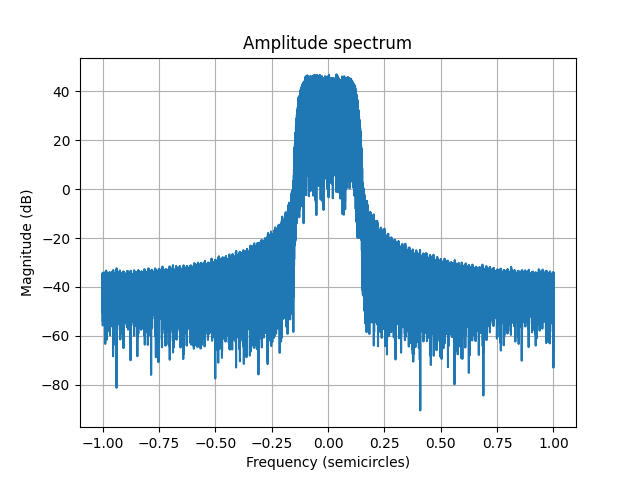

array([[-40.06678736],
       [-37.22184244],
       [-41.08893118],
       ...,
       [-37.69092944],
       [-33.95077373],
       [-43.68523865]])

In [12]:
qpsk_upsc = upscale_to_i16(qpsk_rc)
dsp_lib.plot_spectrum(qpsk_upsc, 2)

In [13]:
dsp_lib.save_cmplx_sig(qpsk_upsc, 'qpsk_rc_int16_1_sig.bin', 'int16')

In [14]:
dsp_lib.save_cmplx_sig(s_rrc, 'rrc_filter.bin', 'float32')